Fruits And Vegetable Classification using Convolutional Neural Network

Import Libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Data Preprocessing

Training Image Preprocessing and
Validation Image Preprocessing
: model training purpose

:test set is evaluation purpose



In [3]:
training_set= tf.keras.utils.image_dataset_from_directory(
    'train',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)


Found 3115 files belonging to 36 classes.


In [4]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)

Found 351 files belonging to 36 classes.


Building **Model**

In [5]:
cnn= tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224,224,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))

Building Convolution Layer
batchnormalization

Compiling Training Phase

In [6]:
cnn.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 64)        0         
 g2D)                                                   

In [7]:
training_history= cnn.fit(x=training_set, validation_data=validation_set, epochs=36)

Epoch 1/36
98/98 [==============================] - 389s 4s/step - loss: 34.8796 - accuracy: 0.0289 - val_loss: 3.5552 - val_accuracy: 0.0513
Epoch 2/36
98/98 [==============================] - 373s 4s/step - loss: 3.5392 - accuracy: 0.0594 - val_loss: 3.5020 - val_accuracy: 0.0712
Epoch 3/36
98/98 [==============================] - 444s 5s/step - loss: 3.3903 - accuracy: 0.1114 - val_loss: 2.8827 - val_accuracy: 0.3419
Epoch 4/36
98/98 [==============================] - 409s 4s/step - loss: 2.9784 - accuracy: 0.2266 - val_loss: 2.3225 - val_accuracy: 0.4615
Epoch 5/36
98/98 [==============================] - 467s 5s/step - loss: 2.3756 - accuracy: 0.3939 - val_loss: 1.9102 - val_accuracy: 0.6068
Epoch 6/36
98/98 [==============================] - 517s 5s/step - loss: 1.8692 - accuracy: 0.5541 - val_loss: 1.5688 - val_accuracy: 0.6809
Epoch 7/36
98/98 [==============================] - 442s 4s/step - loss: 1.4071 - accuracy: 0.6616 - val_loss: 1.0771 - val_accuracy: 0.7692
Epoch 8/36
9

Saving Model

In [8]:
cnn.save('VStrained_model2.h5')

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
training_history.history #Return Dictionary Of History

{'loss': [34.87958908081055,
  3.5392367839813232,
  3.3903234004974365,
  2.978375196456909,
  2.3755807876586914,
  1.8691710233688354,
  1.407092809677124,
  1.1566084623336792,
  1.0073280334472656,
  0.9017365574836731,
  0.7830175161361694,
  0.6093885898590088,
  0.5177813172340393,
  0.4259168803691864,
  0.3319120407104492,
  0.38308778405189514,
  0.3009475767612457,
  0.2973679006099701,
  0.3572387993335724,
  0.2664536237716675,
  0.22755436599254608,
  0.21689407527446747,
  0.1918926239013672,
  0.13617894053459167,
  0.1562744677066803,
  0.0839223638176918,
  0.11771344393491745,
  0.08693567663431168,
  0.1080387532711029,
  0.11143837124109268,
  0.11956027895212173,
  0.08419200032949448,
  0.07713993638753891,
  0.05216281861066818,
  0.06085683032870293,
  0.04521551355719566],
 'accuracy': [0.028892455622553825,
  0.059390049427747726,
  0.11139646917581558,
  0.22664526104927063,
  0.39390048384666443,
  0.5540931224822998,
  0.6616372466087341,
  0.736115574836

In [10]:
training_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [11]:
#Recording History
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [12]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Calculating Accuracy of Model Achieved on Validation Set

In [13]:
print("Validation Set Accuracy: {} %" .format(training_history.history['val_accuracy'][-1]*100))

print("Training Set Accuracy: {} %" .format(training_history.history['accuracy'][-1]*100))

Validation Set Accuracy: 95.44159770011902 %
Training Set Accuracy: 98.68378639221191 %


Visualization

Training

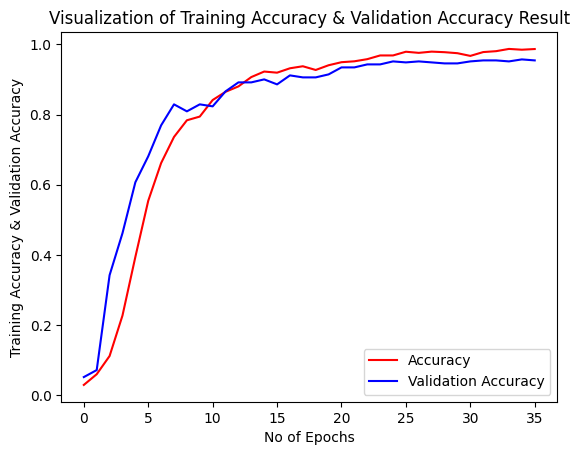

In [14]:
epochs=[i for i in range (1,40)]
plt.plot(training_history.history['accuracy'],color='red',label='Accuracy')
plt.plot(training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy & Validation Accuracy')
plt.title('Visualization of Training Accuracy & Validation Accuracy Result')
plt.legend()
plt.show()

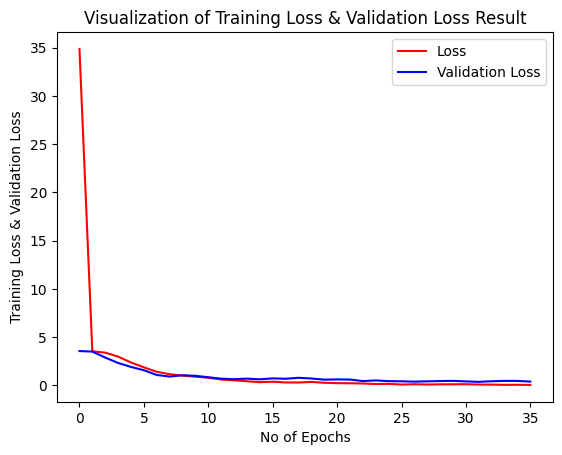

In [15]:
plt.plot(training_history.history['loss'],color='red',label='Loss')
plt.plot(training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.legend()
plt.show()

Evaluation

In [16]:
loss,accuracy=cnn.evaluate(training_set)

98/98 [==============================] - 62s 614ms/step - loss: 0.0350 - accuracy: 0.9913


In [17]:
val_loss,val_accuracy=cnn.evaluate(validation_set)

11/11 [==============================] - 9s 487ms/step - loss: 0.3927 - accuracy: 0.9544


In [18]:
test_set= tf.keras.utils.image_dataset_from_directory(
    'test',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)


Found 359 files belonging to 36 classes.


In [19]:
test_loss,test_accuracy=cnn.evaluate(test_set)

12/12 [==============================] - 11s 628ms/step - loss: 0.3840 - accuracy: 0.9554


In [20]:
test_accuracy*100

95.54317593574524

1/1 [==============================] - 1s 815ms/step
Classification Report:
                precision    recall  f1-score   support

        apple       1.00      0.70      0.82        10
       banana       1.00      0.78      0.88         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       0.90      1.00      0.95         9
      cabbage       1.00      1.00      1.00        10
     capsicum       1.00      0.90      0.95        10
       carrot       1.00      0.89      0.94         9
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      0.89      0.94         9
         corn       0.88      0.70      0.78        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       0.83      1.00      0.91        10
       ginger       1.00      1.00      1.00        10
       grapes       0.90      1.00      0.95         9
     jalepeno       1.00      1.00      1.

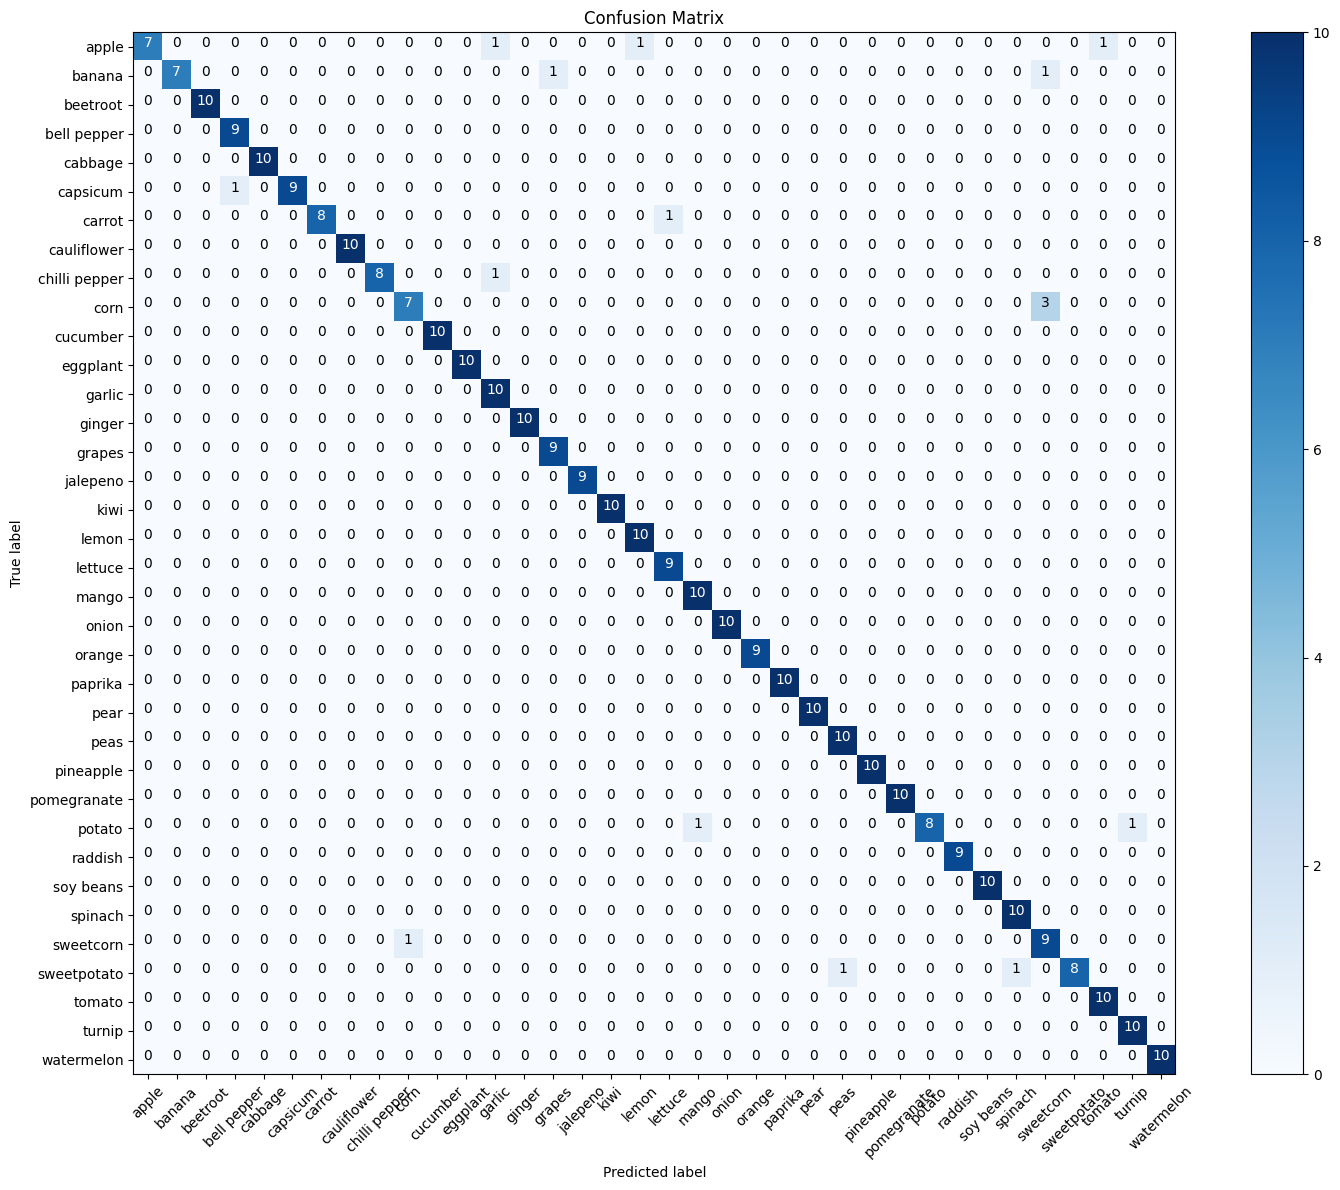

In [21]:

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# ... your previous code ...

# Load the saved model
loaded_model = tf.keras.models.load_model('VStrained_model2.h5')

# Initialize variables to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation set and make predictions
for images, labels in validation_set:
    true_labels.extend(np.argmax(labels, axis=1))  # Get true labels
    predictions = loaded_model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))  # Get predicted labels

# Create a classification report
class_names = validation_set.class_names
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print the classification report
print("Classification Report:\n", report)

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(16, 12))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plot_confusion_matrix(confusion, class_names)
plt.show()


In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have your trained CNN model (cnn) and datasets (training_set, validation_set, test_set)

def get_true_labels_and_predictions(model, dataset):
    true_labels = []
    predicted_labels = []
    for images, labels in dataset:
        true_labels.extend(np.argmax(labels.numpy(), axis=1))
        predicted_labels.extend(np.argmax(model.predict(images), axis=1))
    return true_labels, predicted_labels

# Calculate metrics for the training dataset
train_true_labels, train_pred_labels = get_true_labels_and_predictions(cnn, training_set)
train_cm = confusion_matrix(train_true_labels, train_pred_labels)
train_report = classification_report(train_true_labels, train_pred_labels)

# Calculate metrics for the validation dataset
val_true_labels, val_pred_labels = get_true_labels_and_predictions(cnn, validation_set)
val_cm = confusion_matrix(val_true_labels, val_pred_labels)
val_report = classification_report(val_true_labels, val_pred_labels)

# Calculate metrics for the test dataset
test_true_labels, test_pred_labels = get_true_labels_and_predictions(cnn, test_set)
test_cm = confusion_matrix(test_true_labels, test_pred_labels)
test_report = classification_report(test_true_labels, test_pred_labels)

# Print or use the metrics as needed
print("Train Confusion Matrix:")
print(train_cm)
print("Train Classification Report:")
print(train_report)

print("\nValidation Confusion Matrix:")
print(val_cm)
print("Validation Classification Report:")
print(val_report)

print("\nTest Confusion Matrix:")
print(test_cm)
print("Test Classification Report:")
print(test_report)


1/1 [==============================] - 0s 196ms/step
Train Confusion Matrix:
[[67  0  0 ...  0  0  0]
 [ 0 75  0 ...  0  0  0]
 [ 0  0 88 ...  0  0  0]
 ...
 [ 0  0  0 ... 92  0  0]
 [ 0  0  0 ...  0 98  0]
 [ 0  0  0 ...  0  0 84]]
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        68
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        88
           3       0.99      0.96      0.97        90
           4       1.00      1.00      1.00        92
           5       0.97      0.99      0.98        89
           6       1.00      1.00      1.00        82
           7       1.00      1.00      1.00        79
           8       1.00      0.98      0.99        87
           9       0.95      0.90      0.92        87
          10       1.00      0.99      0.99        94
          11       1.00      1.00      1.00        84
          12       0.95      1.00  

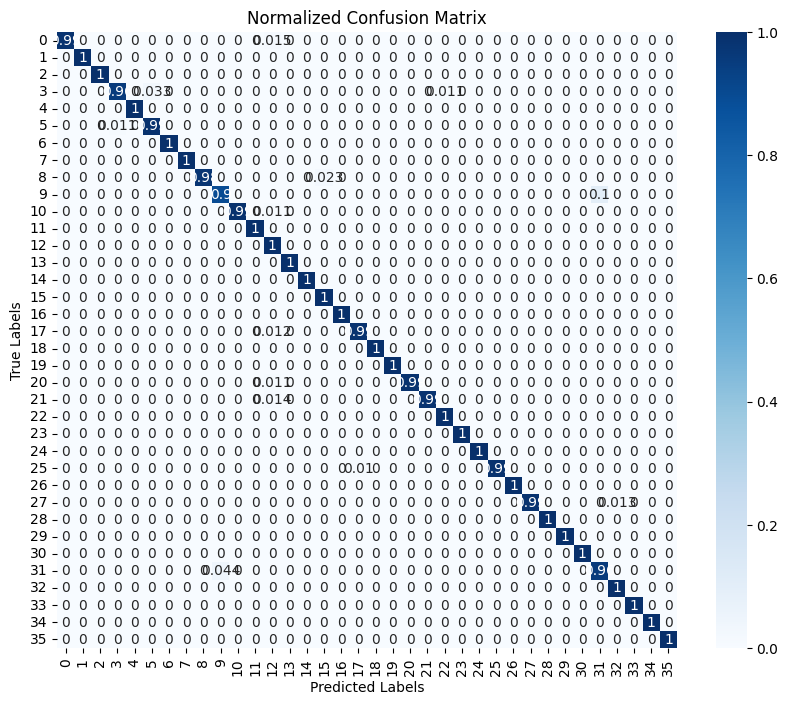

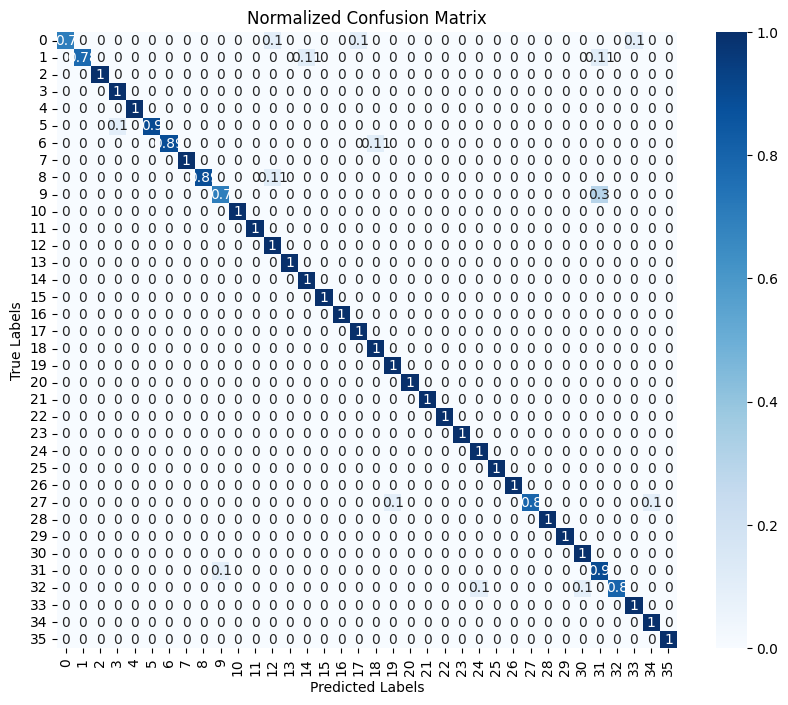

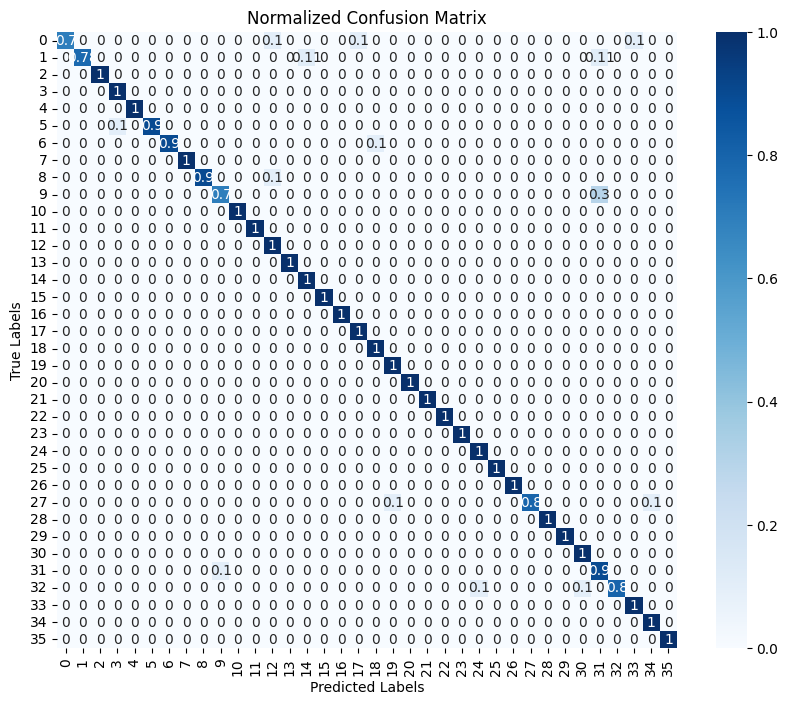

In [23]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# ... (your existing code for loading datasets and defining the CNN model) ...

def normalize_confusion_matrix(cm):
    # Normalize each row of the confusion matrix to sum up to 1
    row_sums = cm.sum(axis=1)
    normalized_cm = cm / row_sums[:, np.newaxis]
    return normalized_cm

# ... (your existing code for getting true labels and predictions and calculating metrics) ...

# Normalize confusion matrices
train_cm_normalized = normalize_confusion_matrix(train_cm)
val_cm_normalized = normalize_confusion_matrix(val_cm)
test_cm_normalized = normalize_confusion_matrix(test_cm)

# Function to plot the normalized confusion matrix
def plot_normalized_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.title('Normalized Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Get class names
class_names = sorted(set(train_true_labels + val_true_labels + test_true_labels))

# Plot normalized confusion matrices for all datasets
plot_normalized_confusion_matrix(train_cm_normalized, class_names)
plot_normalized_confusion_matrix(val_cm_normalized, class_names)
plot_normalized_confusion_matrix(test_cm_normalized, class_names)


1/1 [==============================] - 0s 427ms/step


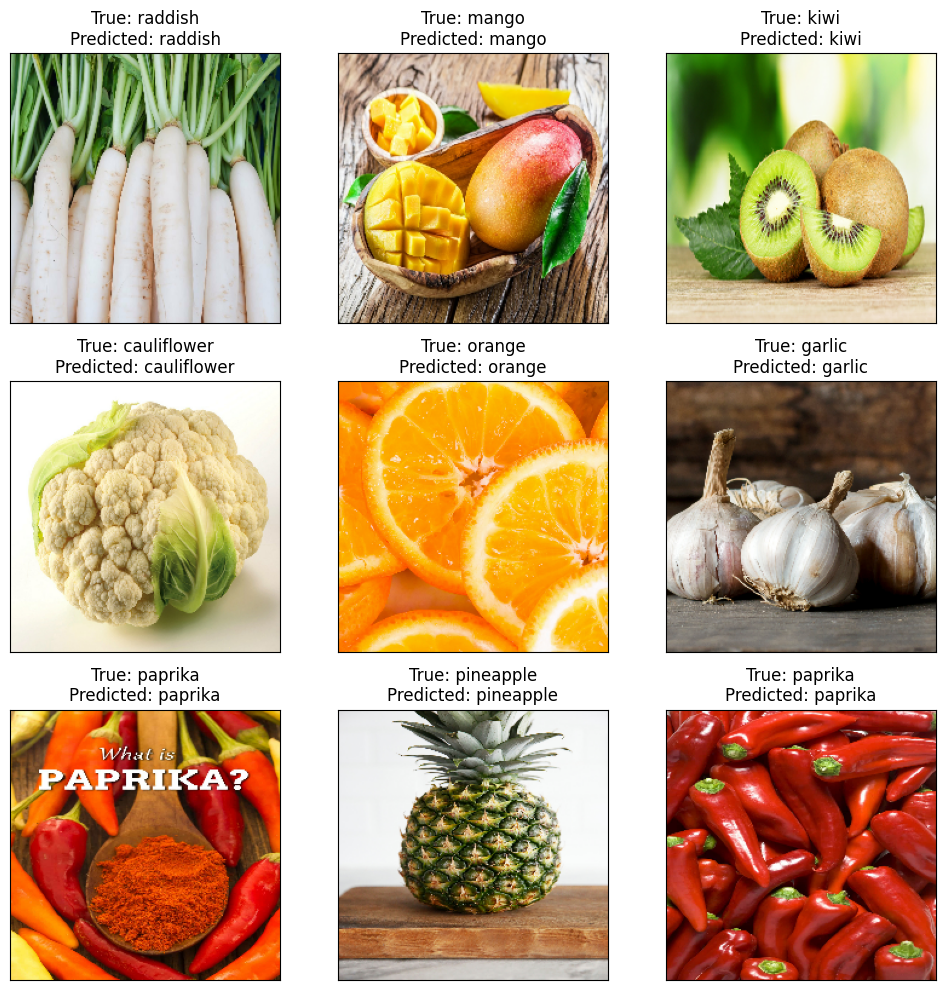

In [24]:
import matplotlib.pyplot as plt

# Assuming you have your CNN model (cnn) and test dataset (test_set)
# The 'pred' variable is already defined with the predicted labels

# Retrieve a few test samples and their corresponding true labels
num_samples_to_display = 9
sample_images, sample_labels = next(iter(test_set.take(num_samples_to_display)))

# Get the corresponding class names from the test_set
class_names = test_set.class_names

# Make predictions on the sampled images
sample_predictions = cnn.predict(sample_images)
sample_predictions = np.argmax(sample_predictions, axis=1)

# Display the images with their true and predicted labels
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i].numpy().astype(np.uint8))
    true_label = class_names[np.argmax(sample_labels[i])]
    predicted_label = class_names[sample_predictions[i]]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")

plt.tight_layout()
plt.show()



**Post Quantization**

In [25]:
#Without Quantization
import tensorflow as tf
model = tf.keras.models.load_model('VStrained_model.h5')
converter= tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model= converter.convert()

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp36_ulfp4\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp36_ulfp4\assets


In [26]:
len(tflite_model)

369575012

In [27]:
with open("tflite_model.tflite", "wb") as f:
    f.write(tflite_model)

With Quantization

In [28]:
#With Quantization
import tensorflow as tf
model = tf.keras.models.load_model('./VStrained_model2.h5')
converter= tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp5sl_58kd\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp5sl_58kd\assets


In [29]:
len(tflite_quant_model)

92405840

In [30]:
with open("tflite_quant_model.tflite", "wb") as f:
    f.write(tflite_quant_model)

In [31]:
!pip install tensorflow-model-optimization

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Quantization aware training

In [32]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer="adam",
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

q_aware_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLa  (None, 224, 224, 3)       3         
 yer)                                                            
                                                                 
 quant_conv2d (QuantizeWrap  (None, 222, 222, 32)      963       
 perV2)                                                          
                                                                 
 quant_conv2d_1 (QuantizeWr  (None, 220, 220, 32)      9315      
 apperV2)                                                        
                                                                 
 quant_max_pooling2d (Quant  (None, 110, 110, 32)      1         
 izeWrapperV2)                                                   
                                                                 
 quant_conv2d_2 (QuantizeWr  (None, 108, 108, 64)      1

In [33]:
training_set= tf.keras.utils.image_dataset_from_directory(
    'train',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)
validation_set= tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [34]:
q_aware_model.fit(x=training_set, validation_data=validation_set, epochs=5)

Epoch 1/5
98/98 [==============================] - 473s 5s/step - loss: 0.7356 - accuracy: 0.8138 - val_loss: 0.3522 - val_accuracy: 0.9402
Epoch 2/5
98/98 [==============================] - 469s 5s/step - loss: 0.1695 - accuracy: 0.9557 - val_loss: 0.3983 - val_accuracy: 0.9487
Epoch 3/5
98/98 [==============================] - 456s 5s/step - loss: 0.1735 - accuracy: 0.9576 - val_loss: 0.4376 - val_accuracy: 0.9516
Epoch 4/5
98/98 [==============================] - 445s 5s/step - loss: 0.1835 - accuracy: 0.9567 - val_loss: 0.4375 - val_accuracy: 0.9516
Epoch 5/5
98/98 [==============================] - 488s 5s/step - loss: 0.1561 - accuracy: 0.9647 - val_loss: 0.5714 - val_accuracy: 0.9430


In [35]:
test_set= tf.keras.utils.image_dataset_from_directory(
    'test',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)
q_aware_model.evaluate(test_set)

Found 359 files belonging to 36 classes.
12/12 [==============================] - 16s 906ms/step - loss: 0.5587 - accuracy: 0.9443


[0.5586612820625305, 0.9442896842956543]

In [36]:
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_qaware_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp9apsmoht\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp9apsmoht\assets
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\tensorflow\lite\python\convert.py:947: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [37]:
len(tflite_qaware_model)

92407992

In [38]:
with open("tflite_qaware_model.tflite", 'wb') as f:
    f.write(tflite_qaware_model)